# Assignment 5: Gradient Descent - Linear Regression
**Lauren Enriquez**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.model_selection

In [2]:
# Set up data 
diabetes_X, diabetes_y = sklearn.datasets.load_diabetes(return_X_y = True)
# Split into train and test sets
split = sklearn.model_selection.train_test_split(diabetes_X, diabetes_y)
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = split

## 1. Loss Functions

In this exercise we'll be considering a simple linear model:

$$y \approx \theta x$$

The hypothesis for the model is written as

$$h(\theta) = \theta x$$

### a. Fill in the following methods for the loss functions and their derivatives.


In [3]:
def squared_loss(X, theta, y):
    """
    Returns the squared loss
    
    Input:
    X: n length vector - n datapoints
    theta: scalar
    y: n length vector
    
    Output:
    loss: scalar
    """
    # TODO:
    loss = np.sum((y - theta*X)**2)

    return loss

In [4]:
def squared_deriv(X, theta, y):
    """
    Returns the gradient wrt theta of the squared loss
    
    Input:
    X: n length vector - n datapoints
    theta: scalar
    y: n length vector
    
    Output:
    grad: scalar
    """
    # TODO:
    grad = np.sum(-2 * X * (y - (theta* X)))

    return grad

In [5]:
def abs_loss(X, theta, y):
    """
    Returns the absolute value loss
    
    Input:
    X: n length vector - n datapoints
    theta: scalar
    y: n length vector
    
    Output:
    loss: scalar
    """
    # TODO:
    loss = np.sum(abs(y - theta*X))

    return loss

In [6]:
def abs_deriv(X, theta, y):
    """
    Returns the gradient wrt theta of the absolute loss
    
    Input:
    X: n length vector - n datapoints
    theta: scalar
    y: n length vector
    
    Output:
    grad: scalar
    """
    # TODO:
    grad = np.sum(-X * (y - theta * X)/ (abs(y - theta * X)))

    return grad

### b. Plot the loss and the gradient for the provided data, simple_x and simple_y

In other words, compute an array of losses + gradients with pos_theta (find  loss and gradient for each possible theta).

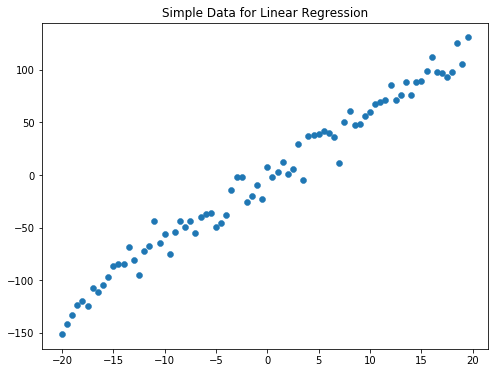

In [7]:
# Data you'll use with the above methods
simple_x = np.arange(-20,20,0.5)

# Yields a float between 3 and 7
true_theta = 4*np.random.random_sample()+3
# Add noise and scale y
simple_y = true_theta*simple_x + np.random.normal(scale = 10, size=simple_x.shape)

plt.figure(figsize = (8,6))
plt.title("Simple Data for Linear Regression")
plt.scatter(simple_x, simple_y, linewidths=0.5)
plt.show()

In [8]:
# Possible theta values (to iterate through)
pos_theta = np.arange(0, 10, 0.01)

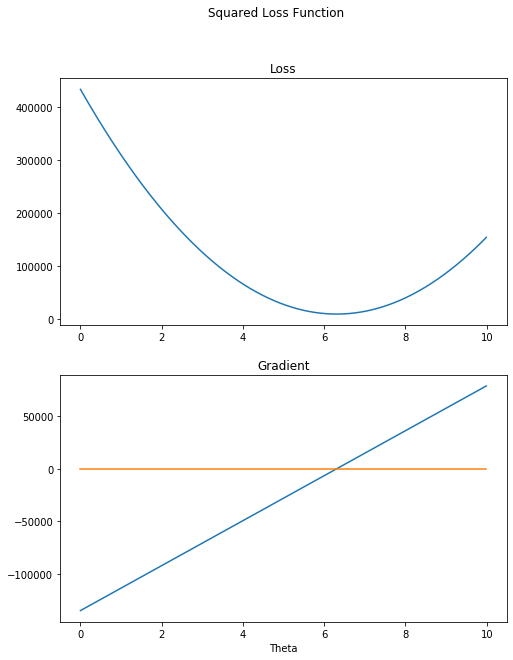

In [9]:
# Plot squared loss and gradient
plt.figure(figsize=(8,10))
plt.suptitle("Squared Loss Function")
plt.subplots_adjust(hspace=0.2)
plt.subplot(2,1,1)

# TODO: Find and plot loss
loss = [squared_loss(simple_x,theta,simple_y) for theta in pos_theta]

plt.plot(pos_theta,loss)
plt.title("Loss")

plt.subplot(2,1,2)

# TODO: Find and plot gradient

grad = [squared_deriv(simple_x,theta, simple_y) for theta in pos_theta]
plt.plot(pos_theta,grad)
plt.plot(pos_theta, np.zeros_like(pos_theta))
plt.title("Gradient")
plt.xlabel("Theta")

plt.show()

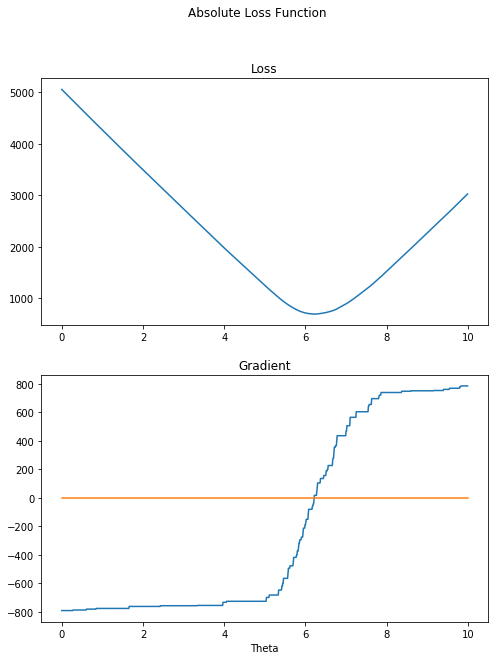

In [10]:
# Plot absolute loss and gradient
plt.figure(figsize=(8,10))
plt.suptitle("Absolute Loss Function")
plt.subplots_adjust(hspace=0.2)
plt.subplot(2,1,1)

# TODO: Find and plot loss
loss1 = [abs_loss(simple_x,pos_theta[i],simple_y) for i in range(len(pos_theta))]
plt.plot(pos_theta,loss1)
plt.title("Loss")

plt.subplot(2,1,2)

# TODO: Find and plot gradient
grad1 = [abs_deriv(simple_x,theta, simple_y) for theta in pos_theta]
plt.plot(pos_theta,grad1)
plt.plot(pos_theta, np.zeros_like(pos_theta))
plt.title("Gradient")
plt.xlabel("Theta")

plt.show()

### c. Given that the gradient descent algorithm uses the first derivative to  find a local minimum, which of the above loss functions is preferable for linear regression using gradient descent? Briefly explain using the above plots.

#### Answer:

TODO: The **squared loss function is preferable** since it is a continous function and differentiable. Solving for $\theta$ when the gradient (derivative of the squared loss function) is 0 is managable. The graph of the gradient using the squared loss function can easily illustrate at which $\theta$ value the gradient is zero.<br><br> On the other hand, the absolute loss function is continous and differentiable everywhere **except at the point x = 0**. Therefore, is not possible to solve for $\theta$ when the gradient (derivative of the absolute loss function) is 0. With the absolute loss function, it is more difficult to to visually determine at which $\theta$ value the gradient is zero.


## 2. Gradient Descent Linear Regression

Here you'll implement a linear regressor using gradient descent and the diabetes dataset initialized at the top of this assignment. Using the L2-norm squared loss function, the gradient descent algorithm will follow the below given formula to update the parameters and find the optimal solution.
______
The model:

$$ y \approx X w $$

Hypothesis:

$$ h(w) = Xw $$
______
**Gradient Descent Update Function:**

$$ w_{n+1} = w_n - \alpha \nabla L(w_n) $$

Due to the relatively small size of the dataset, use all datapoints for computing the gradient (also known as batch gradient descent - compare to stochastic gradient descent, an optimization over batch).

_____

The L2-norm squared loss for this model is written as

$$ L(w) = ||X w - y ||^2_2 $$

_____

### a. Find the gradient of the loss function with respect to w.

Answer:

TODO:  $$L(w) = (Xw − y)^T(Xw − y) = ||Xw − y||^2_2  = (X^Tw - y)^2$$

$$ ∇L(w) = 2(X^Tw - y) \frac{∂}{∂w}(X^Tw-y) $$

$$ ∇L(w) = 2(X^Tw-y)(X^T) $$

$$ ∇L(w) = 2X^T(Xw − y) $$


### b. Implement the following methods to perform linear regression using gradient descent.

In [11]:
from numpy import linalg 
def gd_linreg(X, y, alpha, loss_func, derivative_func, epsilon=0.001, max_iters=10000):
    """
    Performs linear regression on X and y using gradient descent

    Input:
    X: n x m matrix - n datapoints, m features
    y: n length vector
    alpha: step size for gradient descent update
    loss_func: method to compute loss between two quantities
    derivative_func: method to compute gradient wrt w
    epsilon: maximum difference between the w_n+1 and w_n for convergence 

    Output:
    w: m length vector - weights for each feature of a data point
    losses: array of losses at each step/iteration
    """
    # TODO:
    w = np.random.randint(1,101,10)
    losses = []

    w_n = np.random.randint(1,101,10)
    max_diff = w_n - w
    count = 0
    while np.linalg.norm(max_diff) > epsilon:

        if count == max_iters:
            break
        #Calculate the cost
        loss = loss_func(X,w,y)
        losses.append(loss)
        
        #Update parameter
        w_n = w - alpha * derivative_func(X,w,y)
        
        max_diff = w_n - w
        count += 1
        
        w = w_n
                      
    return w, losses

In [12]:
def loss_linreg(X, w, y):
    """
    Evaluates the loss function
    
    Input:
    X: n x m - n datapoints, m features
    w: m length vector - weights for features in X
    y: n length vector
    
    Output:
    loss: scalar
    """
    #TODO:
    loss = np.dot((np.dot(X,w) - y).T,(np.dot(X,w) - y))
    return loss


In [13]:
def derivative_loss_linreg(X, w, y):
    """
    Finds the derivative of the loss function wrt w
    
    Input:
    X: n x m - n datapoints, m features
    w: m length vector - weights for features in X
    y: n length vector

    Output:
    gradient: length m array - gradient wrt w
    """
    #TODO:
    grad = np.dot((2 * X.T), (np.dot(X,w) - y))

    return grad


### c. Run gradient descent with an appropriate step size.

In [14]:
# TODO: set an appropriate alpha
alpha = 0.0005

diabetes_w, losses = gd_linreg(diabetes_X_train, diabetes_y_train, alpha, loss_linreg, derivative_loss_linreg)

In [15]:
print(diabetes_w)
print(len(losses))

[ -51.0247113  -266.10080999  464.10634259  224.85328539  -98.37133083
    7.40782805 -113.9843292    89.473852    478.86442929  263.35181685]
10000


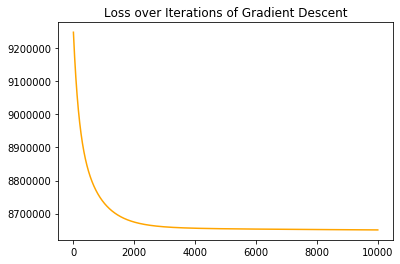

In [16]:
# Plot losses (may help find a good value for alpha)
num_iter = len(losses)

plt.title("Loss over Iterations of Gradient Descent")
plt.plot(range(1, num_iter+1), losses, c = 'orange');

## 3. Evaluate your Implementation

### a. Find the loss for the training set and the test set using the weights found with gradient descent.

In [17]:
# TODO:

diabetes_test_w, test_losses = gd_linreg(diabetes_X_test, diabetes_y_test, alpha, loss_linreg, derivative_loss_linreg)

gd_train_loss = np.min(losses)/diabetes_X_train.shape[0]
gd_test_loss = np.min(test_losses)/diabetes_X_test.shape[0]

print("Method: Gradient Descent")
print("Training Loss: " + str(gd_train_loss))
print("Test Loss: " + str(gd_test_loss))

Method: Gradient Descent
Training Loss: 26135.64255998853
Test Loss: 24349.903144103577


### b. Write and implement the OLS solution for w.

The OLS solution sets the above found gradient of the loss wrt to w to 0 (from 2a) and solves for w.

Answer: To solve for w, we set $$ ∇L(w) = 2X^T(Xw − y) = 0 $$   
Moving things around we get: <br>
$$2X^TXw - 2X^Ty = 0$$
$$2X^TXw = 2X^T y $$
$$ X^TXw = X^T y $$

If X<sup>T</sup>X is full-rank, which usually happens when n ≥ m and there are no repeated input vectors—
when the columns of X are linearly independent—then we can find w by solving the linear system:

$$ w =(X^TX)^{-1} X^Ty $$

TODO:



In [18]:
def OLS(X, y):
    """
    Finds OLS solution to linear regression of X and y

    Input:
    X: n x m - n datapoints, m features
    y: n length vector

    Output:
    w: m length vector - weights for features in X
    """

    # TODO:
    w = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))

    return w


In [19]:
ols_w = OLS(diabetes_X_train, diabetes_y_train)
ols_w1 = OLS(diabetes_X_test, diabetes_y_test)

### c. Find the loss for the training set and the test set using the weights found with OLS.

In [20]:
# TODO:
ols_train_loss = (loss_linreg(diabetes_X_train,ols_w,diabetes_y_train))/diabetes_X_train.shape[0]
ols_test_loss = (loss_linreg(diabetes_X_test,ols_w1,diabetes_y_test))/diabetes_X_test.shape[0]

print("Method: OLS")
print("Training Loss: " + str(ols_train_loss))
print("Test Loss: " + str(ols_test_loss))

Method: OLS
Training Loss: 26041.948488716265
Test Loss: 24166.778127978057
